# EXPLORATORY DATA ANALYSIS - GO TO COLLEGE
#### Prepared by: Kevin dan Muhammad Tauhid
<hr>

1. **Import Package**
- Sebelum kami memulai import dataset yang akan dipakai, kami terlebih dahulu import package yang akan dipakai selama project ini.

In [26]:
import numpy as np # Package numpy, untuk melakukan perhitungan dengan Array
import pandas as pd # Package pandas, untuk melakukan perhitungan dengan DataFrame atau Series
import matplotlib.pyplot as plt # Package matplotlib, untuk data visualization
import seaborn as sns # Package seaborn, untuk data visualization
import warnings # Package warnings, untuk mengeliminasi warnings yang mungkin muncul
warnings.filterwarnings('ignore')

<hr>

2. **Data Import**
- Kelompok kami menggunakan dataset dari platform [**Kaggle**](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) yang berjudul "Go To College" oleh Saddam Sinatrya Jalu Mukti. Menurut penjelasan pemilik dataset didalam website tersebut, data yang akan kami pakai adalah data sintesis yang bertujuan untuk memprediksi apakah siswa akan melanjutkan studi ke tingkat universitas atau tidak. Berikut penjelasannya: 

```
This is a synthetic data created for a college project. This data aims to predict whether students will continue to go to college or not. With machine learning explainability, school counselors can help students that will not go to college by finding the factor and helping them. Lets build something really helpful.
```

In [27]:
df=pd.read_csv('data.csv') # Untuk import Dataset dengan format .csv dengan nama variabel "df"
df.head(5) # Untuk menampilkan overview dari Dataset yang sudah di-import

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


<hr>

3. **Set Index**
- Dikarenakan belum ada index yang dipersiapkan oleh dataset tersebut, dan juga mengingat tidak ada primary key yang dapat dipakai dari kolom-kolom di dalam tabel, maka kami memutuskan untuk membuat index dari angka 1 sampai dengan baris terakhir dalam tabel.


In [28]:
df['No.']=df.index+1 # Untuk menambahkan column baru bernama "No." sesuai dengan nomor Index yang ditambahkan 1
df.set_index('No.',inplace=True) # Untuk menggunakan column yang baru dibuat yaitu "No." sebagai Index tabel
df.head(5) # Untuk menampilkan overview dari Dataset yang sudah ditambahkan index

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
No.,,,,,,,,,,,
1,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
2,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
3,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
4,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
5,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


<hr>

4. **Describe Column**
- Untuk melihat isi dari column-column yang terdapat dalam Dataset ini, maka diperlukan describe setiap kolom untuk melihat apa value dan data dari setiap kolom yang tersedia.

<hr>

4.1 Kolom **Type School**

In [29]:
df_type_school=pd.crosstab(df['type_school'],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_type_school

col_0,Frequency
type_school,
Academic,60.9
Vocational,39.1


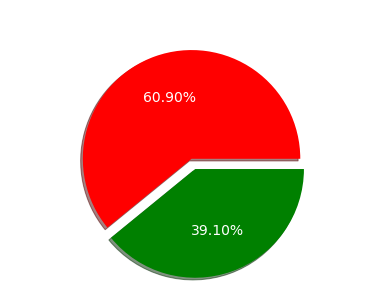

In [64]:
# Visualization
plt.figure(figsize=(6,5))
plt.pie(df_type_school['Frequency'],labels=df['type_school'].unique(),
    colors=['r','g'],
    shadow=True,
    textprops={
        'size':14,
        'color':'white'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.05))
plt.title('Proporsi Tipe Asal Sekolah dari Siswa',color='w',size=20)
plt.show()

<hr>

4.2 Kolom **School Accreditation**

In [37]:
df_school_accreditation=pd.crosstab(df['school_accreditation'],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_school_accreditation

col_0,Frequency
school_accreditation,
A,48.1
B,51.9


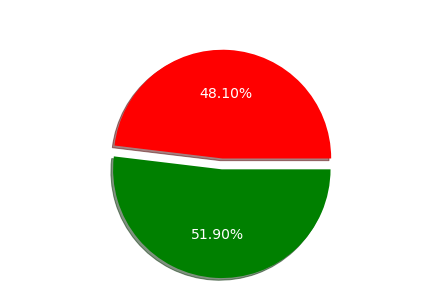

In [63]:
# Visualization
plt.figure(figsize=(6,5))
plt.pie(df_school_accreditation['Frequency'],labels=df['school_accreditation'].unique(),
    colors=['r','g'],
    shadow=True,
    textprops={
        'size':14,
        'color':'white'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.05))
plt.title('Proporsi Akreditasi Asal Sekolah dari Siswa',color='w',size=20)
plt.show()

<hr> 

4.3 Kolom **Gender**


In [43]:
df_gender=pd.crosstab(df['gender'],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_gender

col_0,Frequency
gender,
Female,48.5
Male,51.5


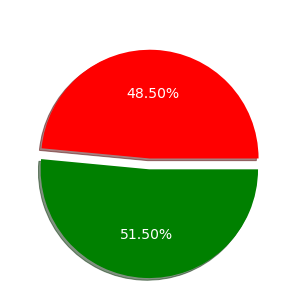

In [62]:
# Visualization
plt.figure(figsize=(6,5))
plt.pie(df_gender['Frequency'],labels=df['gender'].unique(),
    colors=['r','g'],
    shadow=True,
    textprops={
        'size':14,
        'color':'white'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.05))
plt.title('Proporsi Jenis Kelamin Siswa',color='w',size=20)
plt.show()

<hr>

4.4 Kolom **Interest**
- Dikarenakan kolom Interest menggunakan Skala Likert dengan basis 5-poin yang merupakan skala ordinal, maka kami mengtransformasi Skala Likert ini ke data numerical agar dapat diurutkan ketika analisa.

In [47]:
df['interest'].unique() # Untuk melihat skala deskriptif yang dipakai di kolom interest

array(['Less Interested', 'Very Interested', 'Uncertain',
       'Not Interested', 'Quiet Interested'], dtype=object)

In [48]:
# Membuat Function untuk Menentukan Angka Numerikal Setiap Kategori
def likert(x):
    if x=='Not Interested':
        x=1
    elif x=='Less Interested':
        x=2
    elif x=='Uncertain':
        x=3
    elif x=='Quiet Interested':
        x=4
    elif x=='Very Interested':
        x=5
    return x

In [49]:
df['likert_scale']=df['interest'] # Membuat kolom baru sesuai data di kolom interest
df['likert_scale']=df['likert_scale'].apply(likert) # Mengaplikasikan function 'likert' terhadap data di dalam kolom baru
df.head(5)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college,likert_scale
No.,,,,,,,,,,,,
1,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,2
2,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,2
3,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,5
4,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,5
5,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,5


In [69]:
df_interest=pd.crosstab(index=[df['likert_scale'],df['interest']],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_interest

,col_0,Frequency
likert_scale,interest,
1,Not Interested,8.6
2,Less Interested,22.9
3,Uncertain,26.1
4,Quiet Interested,10.0
5,Very Interested,32.4


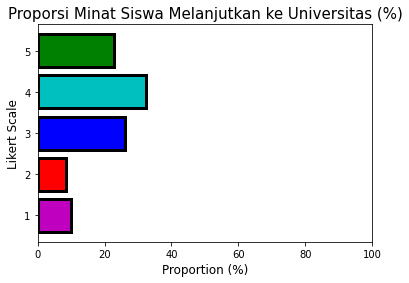

In [82]:
# Visualization
plt.barh(df['likert_scale'].unique(),df_interest['Frequency'],
    color=['r','g','b','m','c'],
    edgecolor='k',
    linewidth=3)
plt.title('Proporsi Minat Siswa Melanjutkan ke Universitas (%)',size=15
)
plt.xticks(np.arange(0,101,20))
plt.ylabel('Likert Scale',size=12)
plt.xlabel('Proportion (%)',size=12)
plt.show()

<hr>

4.5 Kolom **Residence**

In [83]:
df_residence=pd.crosstab(df['residence'],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_residence

col_0,Frequency
residence,
Rural,46.1
Urban,53.9


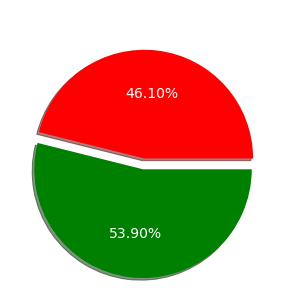

In [84]:
# Visualization
plt.figure(figsize=(6,5))
plt.pie(df_residence['Frequency'],labels=df['residence'].unique(),
    colors=['r','g'],
    shadow=True,
    textprops={
        'size':14,
        'color':'white'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.05))
plt.title('Proporsi Asal Daerah Siswa',color='w',size=20)
plt.show()

<hr>

4.6 Kolom **Parent Age**

In [85]:
df['parent_age'].describe()

count    1000.000000
mean       52.208000
std         3.500427
min        40.000000
25%        50.000000
50%        52.000000
75%        54.000000
max        65.000000
Name: parent_age, dtype: float64

<hr>

4.7 Kolom **House Area**
- Dikarenakan kami tidak berencana memakai kolom ini untuk analisis lebih lanjut, maka kami memutuskan untuk mengeliminasi kolom ini dari tabel.

In [93]:
df.drop('house_area',axis=1,inplace=True)
df.head(5)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,in_college,likert_scale
No.,,,,,,,,,,,
1,Academic,A,Male,Less Interested,Urban,56,6950000,84.09,False,True,2
2,Academic,A,Male,Less Interested,Urban,57,4410000,86.91,False,True,2
3,Academic,B,Female,Very Interested,Urban,50,6500000,87.43,False,True,5
4,Vocational,B,Male,Very Interested,Rural,49,6600000,82.12,True,True,5
5,Academic,A,Female,Very Interested,Urban,57,5250000,86.79,False,False,5


<hr>

4.8 Kolom **Parent Salary**

In [94]:
df['parent_salary'].describe()

count    1.000000e+03
mean     5.381570e+06
std      1.397546e+06
min      1.000000e+06
25%      4.360000e+06
50%      5.440000e+06
75%      6.382500e+06
max      1.000000e+07
Name: parent_salary, dtype: float64

<hr>

4.9 Kolom **Average Grades**

In [95]:
df['average_grades'].describe()

count    1000.000000
mean       86.097200
std         3.378738
min        75.000000
25%        83.737500
50%        85.575000
75%        88.262500
max        98.000000
Name: average_grades, dtype: float64

<hr> 

4.10 Kolom **Parent Was in College**

In [96]:
df_parent_college=pd.crosstab(df['parent_was_in_college'],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_parent_college

col_0,Frequency
parent_was_in_college,
False,48.0
True,52.0


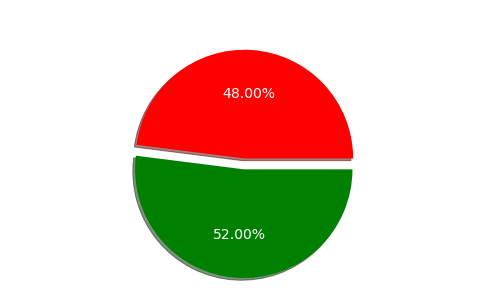

In [97]:
# Visualization
plt.figure(figsize=(6,5))
plt.pie(df_parent_college['Frequency'],labels=df['parent_was_in_college'].unique(),
    colors=['r','g'],
    shadow=True,
    textprops={
        'size':14,
        'color':'white'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.05))
plt.title('Proporsi Apakah Orang Tua Lulusan Universitas',color='w',size=20)
plt.show()

<hr>

4.11 Kolom **In College**

In [98]:
df_kids_college=pd.crosstab(df['in_college'],columns='Frequency',normalize=True)*100 # Untuk membagi setiap kategori di dalam persentase yang akan diekstrak ke pie-chart
df_kids_college

col_0,Frequency
in_college,
False,50.0
True,50.0


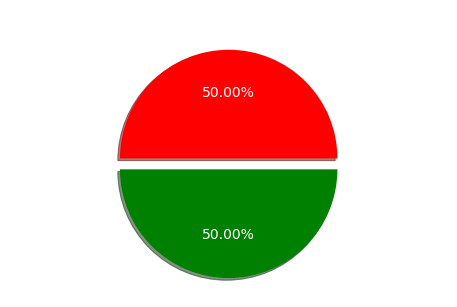

In [99]:
# Visualization
plt.figure(figsize=(6,5))
plt.pie(df_kids_college['Frequency'],labels=df['in_college'].unique(),
    colors=['r','g'],
    shadow=True,
    textprops={
        'size':14,
        'color':'white'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.05))
plt.title('Proporsi Apakah Siswa Lanjut ke Universitas',color='w',size=20)
plt.show()

<hr>

5. **Cek Outliers**

In [109]:
def check_outliers(df,col):
    Q1=df[col].describe()['25%']
    Q3=df[col].describe()['75%']
    IQR=Q3-Q1
    Upper_fence=Q3+(1.5*IQR)
    Lower_fence=Q1-(1.5*IQR)
    df_outliers=df[(df[col]<Lower_fence) | (df[col]>Upper_fence)]
    if len(df_outliers)==0:
        return 'No Outliers'
    else:
        return df_outliers

In [110]:
df_out_age=check_outliers(df,'parent_age')
df_out_age

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,in_college,likert_scale
No.,,,,,,,,,,,
95,Vocational,B,Male,Very Interested,Rural,41,9110000,91.70,True,True,5
116,Vocational,A,Male,Less Interested,Rural,43,7510000,84.64,False,False,2
149,Vocational,B,Female,Uncertain,Rural,42,8080000,89.39,True,True,3
221,Academic,B,Female,Uncertain,Urban,64,3860000,85.28,False,True,3
251,Vocational,A,Female,Less Interested,Urban,61,4230000,84.39,False,True,2
259,Vocational,A,Female,Uncertain,Rural,43,7090000,84.19,True,False,3
337,Academic,B,Female,Less Interested,Rural,40,3810000,81.00,True,False,2
354,Vocational,B,Female,Very Interested,Rural,43,6800000,82.62,True,False,5
366,Academic,B,Female,Very Interested,Rural,43,3800000,79.10,True,False,5


In [112]:
df_out_salary=check_outliers(df,'parent_salary')
df_out_salary

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,in_college,likert_scale
No.,,,,,,,,,,,
460,Academic,A,Female,Less Interested,Urban,52,10000000,83.67,False,True,2
974,Academic,B,Male,Less Interested,Urban,53,1000000,90.28,False,True,2


In [113]:
df_out_grades=check_outliers(df,'average_grades')
df_out_grades

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,in_college,likert_scale
No.,,,,,,,,,,,
135,Academic,B,Female,Uncertain,Rural,50,4410000,96.56,True,True,3
178,Academic,B,Female,Uncertain,Rural,52,5340000,95.10,True,True,3
253,Academic,B,Male,Uncertain,Rural,50,7880000,96.10,True,True,3
453,Academic,B,Female,Uncertain,Rural,51,5040000,96.72,True,True,3
491,Academic,B,Female,Not Interested,Rural,48,6090000,95.81,True,True,1
579,Academic,B,Male,Uncertain,Rural,50,3300000,96.23,True,True,3
596,Vocational,B,Female,Not Interested,Rural,48,5830000,98.00,True,True,1
731,Academic,B,Male,Uncertain,Rural,54,2590000,95.94,True,True,3
768,Vocational,A,Female,Uncertain,Urban,58,2830000,75.00,False,True,3


Decision: Kami memutuskan untuk mengikutsertakan setiap outlier dari usia orang tua, pendapatan orang tua dan rata-rata nilai siswa dalam analisa dikarenakan jumlahnya yang memiliki proporsi kecil terhadap keseluruhan populasi.

<hr>

6. ANALYSIS

# MAIN BUSINESS QUESTION
- Bagaimana Klien (Institusi Pendidikan) dapat menentukan strategi promosi terbaik dalam menghadapi Edufair yang sudah diselenggarakan kembali dalam format offline dan online maupun hybrid setelah pandemi Covid-19.

# 1. Apakah klien harus memprioritaskan kegiatan promosinya bagi salah satu gender tertentu?
- Insight
    - Tidak ada perbedaan signifikan antara jumlah siswa dari gender perempuan maupun laki-laki yang memutuskan lanjut ke universitas (jumlah siswi lebih banyak 2 orang dibandingkan siswa)
    - Ada perbedaan signifikan antara jumlah siswa dari gender perempuan maupun laki-laki yang memutuskan tidak lanjut ke universitas (jumlah siswi lebih sedikit 32 orang dibandingkan siswa) yang dapat dipengaruhi oleh pendidikan yang lebih tinggi diperlukan untuk mobilitas sosial yang lebih tinggi dan peningkatan kemakmuran. Selanjutnya, perempuan memerlukan pendidikan yang lebih tinggi untuk memperoleh pekerjaan yang sama dengan laki‐laki. Akan tetapi  tidak dapat  disangkal  bahwa globalisasi menuntun pada  perhatian  lebih  terhadap  egalitarianisme  gender. Akhirnya , kenyaataanya memang perempuan sering memperoleh nilai rapor yang lebih tinggi daripada laki‐laki. (source: [Suara Unpar oleh P. Krismastono Soediro, Kepala Kantor Yayasan Unpar](https://unpar.ac.id/mengapa-mahasiswi-lebih-banyak-daripada-mahasiswa/))

- Rekomendasi
    - Tidak perlu membuat promosi khusus untuk salah satu gender.
    - Klien perlu melakukan promosi besar-besaran dikarenakan jumlah siswa-siswi yang memutuskan untuk tidak lanjut ke universitas jumlahnya sama dengan yang lanjut, sehingga masih banyak sekali calon siswa-siswi yang masih belum lanjut studi ke universitas. Faktor siswa-siswi enggan lanjut ke universitas berupa ekonomi (**cost-benefit**, bagi siswa SMK lebih baik langsung bekerja maupun terkendala biaya pendidikan), **mengambil gap year**, maupun karena **tidak diterima di kampus pilihan**. (source: [IDN Times](https://www.idntimes.com/life/education/angel-rose-1/alasan-orang-enggan-melanjutkan-pendidikan))
    - Promosi yang dapat dijalankan berupa promosi biaya pendidikan, menaikkan branding kampus, senantiasa menaikkan akreditas kampus, promosi di media sosial, memanfaatkan SEO, menemukan nilai diferensial dibandingkan institusi lain, dan mengikuti pameran (source: [Mau Kuliah](https://maukuliah.id/blog/cara-mempromosikan-kampus-pts-dan-ptn-untuk-menarik-mahasiswa-baru/))

In [142]:
pd.crosstab(index=df['in_college'],columns=df['gender'])

gender,Female,Male
in_college,,
False,234,266
True,251,249


<hr> 

# 2. Apakah klien perlu fokus kepada calon siswa di kota besar dan metropolitan atau di kota kecil ?

- Insight:
    - Jumlah siswa-siswi yang lanjut studi ke universitas sebagian besar berasal dari kota besar (42 orang atau 8% diatas siswa-siswi dari kota kecil)
    - Jumlah siswa-siswi yang tidak lanjut studi ke universitas sebagian besar berasal dari kota kecil (36 orang atau 8% diatas siswa-siswi dari kota besar)

- Rekomendasi:
    - Dikarenakan selisih antara kedua kategori masih dibawah 10%, klien tetap harus melakukan promosi kepada calon siswa-siswi dari kota besar maupun kota kecil
    - Dengan naiknya biaya transportasi darat (kenaikan harga minyak mentah dunia) dan udara (kenaikan harga avtur) yang signifikan, klien lebih baik melakukan promosi secara online dibandingkan offline untuk calon siswa-siswi di kota kecil. (source: [Kompas.com](https://www.kompas.com/tren/read/2022/04/20/200500565/siap-siap-harga-tiket-pesawat-bakal-naik-apa-penyebabnya-?page=all))
    - Edufair masih merupakan media promosi yang lebih efektif dalam menjangkau calon mahasiswa dibandingkan promosi lewat media sosial, maka klien lebih baik melakukan promosi offline dengan mengikuti edufair untuk sekolah di kawasan Jabodetabek dan yang dapat dijangkau melalui kereta api dikarenakan harga tiket kereta api masih cukup stabil. (source: "The Effectiveness of Education Fair and Social Media Advertisements on The Interest of New Prospective Students" paper oleh Kaharmudzakir, Isfa et.al (2020))

In [143]:
pd.crosstab(index=df['in_college'],columns=df['residence'])

residence,Rural,Urban
in_college,,
False,232,268
True,229,271


<hr>

# 3. Apakah hasil survey yang dilakukan valid terhadap keputusan akhir untuk lanjut ke universitas?

- Insight:
    - Persentase tertinggi untuk siswa yang tidak lanjut ke universitas ada pada jawaban survey less interested dengan 28%, diikuti dengan jawaban survey very interested dengan 27%.
    - Persentase tertinggi untuk siswa yang lanjut ke universitas ada pada jawaban survey very interested dengan 38% dan diikuti dengan uncertain dengan 32%.
    - Jawaban survey not interested menunjukkan 8% dari siswa yang tidak lanjut dan 9%  dari siswa yang lanjut ke universitas.
    - Ekspektasi dalam survey ini tentunya adalah dapat mempredikasi bahwa calon mahasiswa yang menjawab less interested dan not interested akan memiliki jumlah mahasiswa aktual yang melanjutkan studi ke universitas lebih rendah dibandingkan yang menjawab quite interested dan very interested, begitu pula sebaliknya. Ketika dibandingkan antara ekspektasi (interest/minat) dengan aktualnya, siswa-siswi yang menjawab tidak berminat untuk melanjutkan studi ke universitas menunjukkan angka yang lanjut ke universitas yang lebih besar dibandingkan dengan yang lumayan berminat (quiet interested).
    - Siswa yang menjawab sangat berminat melanjutkan studi ke universitas memiliki persentase siswa yang tidak lanjut ke universitas yang lebih besar dibandingkan siswa yang menjawab tidak berminat (not interested)
    - Siswa yang menjawab uncertain/jawaban netral meliputi lebih dari 20% dari seluruh siswa yang mengikuti survey.

- Rekomendasi:
    - Dengan banyaknya jawaban yang berbanding terbalik dengan kenyataan, kami merekomendasikan klien untuk mencari referensi survey berupa pertanyaan kuesioner yang lebih reliable dan dapat digunakan untuk mengukur tingkat minat siswa-siswi terhadap studi di universitas lebih baik dibandingkan yang digunakan sebelumnya.
    - Dikarenakan seperlima siswa menjawab uncertain yaitu midpoint dari skala Likert, kami merekomendasikan untuk menggunakan skala Likert yang berjumlah ganjil untuk mengeliminasi midpoint yang ada. (source: “Evidence-Based Survey Design: The Use of a Midpoint on the Likert Scale” Paper oleh S. Y. Chyung, et. Al (2017))

In [145]:
df_likert=pd.crosstab(index=[df['likert_scale'],df['interest']],columns=df['in_college'])
df_likert

,in_college,False,True
likert_scale,interest,,
1,Not Interested,40,46
2,Less Interested,142,87
3,Uncertain,103,158
4,Quiet Interested,81,19
5,Very Interested,134,190


In [155]:
df_likert_pct=(pd.crosstab(index=[df['likert_scale'],df['interest']],columns=df['in_college'],normalize='columns')*100).round(2)
df_likert_pct

,in_college,False,True
likert_scale,interest,,
1,Not Interested,8.0,9.2
2,Less Interested,28.4,17.4
3,Uncertain,20.6,31.6
4,Quiet Interested,16.2,3.8
5,Very Interested,26.8,38.0


In [162]:
df_merge1=pd.merge(df_likert,df_likert_pct,on=('likert_scale','interest'))
df_merge1.columns=['Not Going to College','Going to College','Not Going to College (%)','Going to College (%)']
df_merge1


,,Not Going to College,Going to College,Not Going to College (%),Going to College (%)
likert_scale,interest,,,,
1,Not Interested,40,46,8.0,9.2
2,Less Interested,142,87,28.4,17.4
3,Uncertain,103,158,20.6,31.6
4,Quiet Interested,81,19,16.2,3.8
5,Very Interested,134,190,26.8,38.0


<hr>

# 4. Apakah tingkat akreditasi sekolah dan tipe sekolah mempengaruhi tingkat penerimaan mahasiswa?

- Insight:
    - Sebagian besar mahasiswa berasal dari sekolah tinggi umum (SMA/SMU/MA) yang memiliki persentase sedikit diatas 60% dari total siswa
    - Sebagian besar mahasiswa yang melanjutkan studi ke tingkat univesitas berasal dari sekolah tinggi umum (SMA/SMU/MA) yang memiliki persentase 62.6%.
    - Sebagian besar mahasiswa yang tidak melanjutkan studi ke tingkat univesitas berasal dari sekolah tinggi umum (SMA/SMU/MA) yang memiliki persentase 59.2%.
    - Akreditasi sekolah cukup berimbang terhadap persentase siswa yang tidak melanjutkan studi ke universitas (Akreditasi A: 46.6% dibandingkan Akreditasi B: 53.4%)
    - Akreditasi sekolah cukup berimbang terhadap persentase siswa yang melanjutkan studi ke universitas (Akreditasi A: 49.6% dibandingkan Akreditasi B: 50.4%)

- Rekomendasi:
    - Dengan jumlah siswa di sekolah umum yang lebih banyak dibandingkan sekolah kejuruan, didukung pula dengan tingkat mahasiswa yang melanjutkan ke universitas yang cukup berimbang, maka akan lebih menguntungkan bagi klien untuk melakukan promosi kepada siswa di sekolah umum dibandingkan sekolah kejuruan.
    - Sekolah umum dengan akreditasi B merupakan sekolah yang siswanya paling banyak melanjutkan ke universitas, maka klien dapat fokuskan untuk memilih sekolah tersebut dibandingkan sekolah tipe lain. 
    

In [163]:
df_sekolah=pd.crosstab(index=[df['type_school'],df['school_accreditation']],columns=df['in_college'])
df_sekolah_pct=(pd.crosstab(index=[df['type_school'],df['school_accreditation']],columns=df['in_college'],normalize='columns')*100).round(2)
df_merge2=pd.merge(df_sekolah,df_sekolah_pct,on=('type_school','school_accreditation'))
df_merge2.columns=['Not Going to College','Going to College','Not Going to College (%)','Going to College (%)']
df_merge2

Not Going to College  Going to College  \
type_school school_accreditation                                           
Academic    A                                      163               125   
            B                                      133               188   
Vocational  A                                       70               123   
            B                                      134                64   

                                  Not Going to College (%)  \
type_school school_accreditation                             
Academic    A                                         32.6   
            B                                         26.6   
Vocational  A                                         14.0   
            B                                         26.8   

                                  Going to College (%)  
type_school school_accreditation                        
Academic    A                                     25.0  
            B                                     37.6  
Vocational  A                                     24.6  
            B                                     12.8

<hr>

# 5. Apakah Siswa yang Lanjut ke Universitas memiliki nilai yang lebih tinggi dibandingkan rata-rata nilai secara keseluruhan?

- Insight:
    - Siswa-siswi yang lanjut ke universitas mempunyai nilai rata-rata yang lebih tinggi dibandingkan rata-rata seluruh siswa maupun yang tidak lanjut ke universitas

- Rekomendasi:
    - Jika klien dihadapkan dengan dua atau beberapa pilihan, prioritaskan untuk melakukan promosi kepada sekolah yang memiliki nilai rata-rata nilai yang lebih tinggi, contohnya Nilai Ujian Nasional yang datanya dapat diakses secara bebas. (source: [Laporan Hasil Ujian Nasional](https://hasilun.puspendik.kemdikbud.go.id/#2019!sma!capaian!01&99&999!T&T&T&T&1&!2!&))

In [167]:
df_kuliah=df[df['in_college']==True]
df_tidak_kuliah=df[df['in_college']==False]

In [182]:
print('Rata-rata seluruh siswa = {}'.format(df['average_grades'].mean()))
print('Rata-rata nilai siswa yang lanjut ke universitas = {}'.format(df_kuliah['average_grades'].mean()))
print('Rata-rata nilai siswa yang tidak lanjut ke universitas = {}'.format(df_tidak_kuliah['average_grades'].mean()))

Rata-rata seluruh siswa = 86.09720000000002
Rata-rata nilai siswa yang lanjut ke universitas = 87.80306
Rata-rata nilai siswa yang tidak lanjut ke universitas = 84.39134


<hr>

# 6. Apakah Siswa yang lanjut ke Universitas mempunyai orang tua yang mempunyai pendapatan lebih tinggi dibandingkan rata-rata pendapatan secara keseluruhan?

- Insight:
    - Siswa-siswi yang lanjut ke universitas mempunyai pendapatan orang tua yang lebih tinggi dibandingkan rata-rata pendapatan orang tua seluruh siswa maupun yang tidak lanjut ke universitas

- Rekomendasi:
    - Jika klien dihadapkan dengan dua atau beberapa pilihan, prioritaskan untuk melakukan promosi kepada sekolah yang mempunyai biaya pendidikan yang lebih tinggi. (source: “Hubungan Antara Status Sosial Ekonomi Orang Tua dengan Minat Siswa Untuk Melanjutkan Studi ke Perguruan Tinggi” Paper oleh Caecilia Dyah Retna Harimurti (2007))

In [183]:
print('Rata-rata pendapatan ortu seluruh siswa = {}'.format(df['parent_salary'].mean()))
print('Rata-rata pendapatan ortu dari siswa yang lanjut ke universitas = {}'.format(df_kuliah['parent_salary'].mean()))
print('Rata-rata pendapatan ortu dari siswa yang tidak lanjut ke universitas = {}'.format(df_tidak_kuliah['parent_salary'].mean()))

Rata-rata pendapatan ortu seluruh siswa = 5381570.0
Rata-rata pendapatan ortu dari siswa yang lanjut ke universitas = 6046040.0
Rata-rata pendapatan ortu dari siswa yang tidak lanjut ke universitas = 4717100.0


<hr>

# 7. Berapa usia rata-rata orang tua siswa yang lanjut ke universitas maupun siswa secara keseluruhan?

- Insight:
    - Rata-rata usia orang tua siswa berada di 52 tahun yang dapat dikategorikan sebagai gen-x atau baby boomers. (source: [Binus Online Learning](https://onlinelearning.binus.ac.id/2021/12/06/begini-perbedaan-generasi-baby-boomers-x-y-z-dan-alpha/))

- Rekomendasi
    - Buat promosi yang menyesuaikan dengan preferensi dari gen-x atau baby boomers, baik dalam memilih platform media sosial (Facebook atau Youtube), harus lebih memperhatikan teknik periklanan tradisional (media cetak berupa brosur, billboard) dan tawarkan hadiah atau program loyalitas. (source: [Forbes.com](https://www.forbes.com/sites/forbesagencycouncil/2021/05/12/three-tips-for-marketing-to-generation-x/?sh=526e0f827cf9))

In [186]:
print('Rata-rata usia ortu seluruh siswa = {} tahun'.format(df['parent_age'].mean()))
print('Rata-rata usia ortu dari siswa yang lanjut ke universitas = {} tahun'.format(df_kuliah['parent_age'].mean()))
print('Rata-rata usia ortu dari siswa yang tidak lanjut ke universitas = {} tahun'.format(df_tidak_kuliah['parent_age'].mean()))

Rata-rata usia ortu seluruh siswa = 52.208 tahun
Rata-rata usia ortu dari siswa yang lanjut ke universitas = 52.358 tahun
Rata-rata usia ortu dari siswa yang tidak lanjut ke universitas = 52.058 tahun


<hr>

# 8. Apakah Sekolah Umum mempunyai nilai yang lebih tinggi daripada Sekolah Kejuruan?

- Insight:
    - Sekolah umum (SMA/SMU/MA) mempunyai rata-rata nilai yang lebih tinggi daripada sekolah kejuruan (SMK).
    - Berdasarkan akreditasi A, sekolah kejuruan mempunyai nilai rata-rata yang sedikit lebih dikit dibandingkan sekolah umum.
    - Berdasarkan akreditasi B, sekolah kejuruan mempunyai nilai rata-rata yang lebih rendah dibandingkan sekolah umum.

- Rekomendasi:
    - Dikarenakan siswa yang lanjut ke universitas cenderung mempunyai nilai rata-rata yang tinggi, maka fokuskan untuk promosi ke sekolah umum dengan akreditasi B.

In [189]:
(pd.crosstab(index=df['type_school'],columns=df['school_accreditation'],values=df['average_grades'],aggfunc='mean')).round(2)

school_accreditation,A,B
type_school,,
Academic,85.45,87.06
Vocational,85.66,85.90


<hr>

# 9. Apakah background pendidikan orang tua berpengaruh terhadap jumlah pendapatannya? 

- Insight:
    - Orang tua yang memiliki latar belakang pendidikan universitas cenderung memiliki rata-rata gaji yang lebih tinggi.
    - Orang tua yang memiliki rata-rata gaji yang paling tinggi menyekolahkan anaknya di sekolah kejuruan dibandingkan sekolah umum.

- Rekomendasi:
    - Dikarenakan ada hubungan pendapatan orang tua dengan keputusan anak dalam melanjutkan studi ke universitas, maka ini mendukung argumentasi untuk tetap melakukan promosi ke sekolah kejuruan dan bukan hanya ke sekolah umum, walaupun memang jumlah siswa di sekolah kejuruan jumlahnya lebih sedikit dibandingkan sekolah umum.

In [197]:
(pd.crosstab(index=df['type_school'],columns=df['parent_was_in_college'],values=df['parent_salary'],aggfunc='mean')).round(0)

parent_was_in_college,False,True
type_school,,
Academic,5174268.0,5296121.0
Vocational,5340000.0,5792971.0
